In [2]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings("ignore")

from xaimoo.utilities.data import label_vehicle_crash, label_two_bar_truss, label_welded_beam
from xaimoo.utilities.visualize import plot_rule_explanations
from xaimoo.explanations.rules import train_skope_rules, explain_skope_rules, train_rulefit_rules, explain_rulefit_rules

## Vehicle crash worthiness

In [3]:
df_crash, var_names, obj_names = label_vehicle_crash("../data/VehicleCrash.csv")

target_category = 1

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.7, "recall_min": 0.7}
classifier = train_skope_rules(df_crash, var_names, target_category, classifier_kwargs=skope_kwargs)
_ = explain_skope_rules(classifier)

Rule --> (Accuracy, Recall)
x3 <= 2.63713 and x4 <= 1.70858 --> (0.9812646370023419, 0.7618181818181818)
x3 <= 2.66645 and x4 <= 1.84423 --> (0.980561555075594, 0.8063943161634103)
x3 <= 2.63601 and x4 <= 1.84423 --> (0.98, 0.786096256684492)
x3 <= 2.62744 and x4 <= 1.74138 --> (0.9748858447488584, 0.7922077922077922)
x3 <= 2.63745 and x4 <= 1.74138 --> (0.9727314814814815, 0.7909023824583596)
x3 <= 2.63745 and x4 <= 1.84423 --> (0.9720930232558139, 0.7827715355805244)
x3 <= 2.64558 and x4 <= 1.84423 --> (0.970917225950783, 0.781981981981982)
x3 <= 2.63998 and x4 <= 1.70858 --> (0.9683972911963883, 0.7814207650273224)
x3 <= 2.6399 and x4 <= 1.76635 --> (0.9662650602409638, 0.7609108159392789)
x3 <= 2.7047 and x4 <= 1.84423 --> (0.9656565656565657, 0.8597122302158273)
x3 <= 2.66647 and x4 <= 1.70858 --> (0.96529284164859, 0.7946428571428571)
x3 <= 2.70609 and x4 <= 1.84423 --> (0.9493670886075949, 0.8256880733944955)
x4 <= 1.84423 and x4 > 1.00506 --> (0.9014598540145985, 0.932075471698

In [6]:
df_crash["skope_mark"] = df_crash.apply(lambda row: (row["x3"] <= 2.63713) and (row["x4"] <= 1.70858), axis=1)

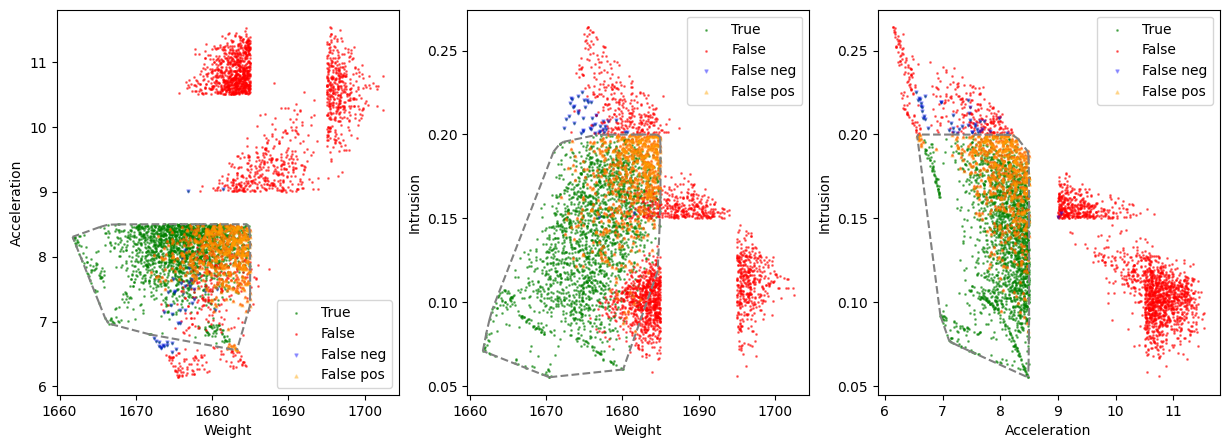

In [7]:
plot_rule_explanations(df_crash, obj_names, "skope_mark", "category", target_category)